In [1]:
import matplotlib.pyplot as plt

In [2]:
## Run three versions of VQEs.
%run Main0_VQE_vanillaY.ipynb            # Vanilla VQE (VQE-V)
%run Main1_VQE_adaptY_taperingY.ipynb    # Adapt-VQE with qubit tapering (VQE-A-T)
%run Main2_VQE_adaptY_activeSpaceY.ipynb # Adapt-VQE with selected active space (VQE-A-S)

<Info of vanilla VQE>
Number of qubits needed: 14
Number of Pauli strings: 666
Completed iteration: 5
Energy: -15.586670350518201 Ha
Step Time: 2.571377754211426 s
----------------
Completed iteration: 10
Energy: -15.588698468777276 Ha
Step Time: 2.755730628967285 s
----------------
Completed iteration: 15
Energy: -15.590805117273433 Ha
Step Time: 2.7800869941711426 s
----------------
Completed iteration: 20
Energy: -15.593202569355165 Ha
Step Time: 2.6648523807525635 s
----------------
Completed iteration: 25
Energy: -15.593906008429808 Ha
Step Time: 3.262272596359253 s
----------------
Completed iteration: 30
Energy: -15.594068423793704 Ha
Step Time: 2.945613145828247 s
----------------
Completed iteration: 35
Energy: -15.594489442288344 Ha
Step Time: 2.8725802898406982 s
----------------
Completed iteration: 40
Energy: -15.594547245834901 Ha
Step Time: 2.915313720703125 s
----------------
Completed iteration: 45
Energy: -15.5946467518154 Ha
Step Time: 2.9757137298583984 s
----------

/home/frankwswang/anaconda3/lib/python3.9/site-packages/pennylane/operation.py:1830: UserWarning: Tensor object acts on overlapping wires; in some PennyLane functions this will lead to undefined behaviour
  warnings.warn(
/home/frankwswang/anaconda3/lib/python3.9/site-packages/pennylane/operation.py:1993: UserWarning: Tensor object acts on overlapping wires; in some PennyLane functions this will lead to undefined behaviour
  warnings.warn(


<Info of Adapt-VQE with qubit tapering>
Number of qubits needed original: 14
Number of qubits needed after tapering: 9
Number of Pauli strings before tapering: 666
Number of Pauli strings after tapering: 596
Original Number of double excitation gates: 180
Number of double excitation gates after filtering: 32
Original Number of single excitation gates: 24
Number of single excitation gates after filtering: 6
Completed iteration 5
Energy: -15.614934901763487 Ha
Step Time: 1.2246265411376953 s
----------------
Completed iteration 10
Energy: -15.615748229302984 Ha
Step Time: 1.1487436294555664 s
----------------
Completed iteration 15
Energy: -15.618786788288558 Ha
Step Time: 1.253852128982544 s
----------------
Completed iteration 20
Energy: -15.62034736102348 Ha
Step Time: 1.1956312656402588 s
----------------
Completed iteration 25
Energy: -15.620786112932016 Ha
Step Time: 1.1298906803131104 s
----------------
Completed iteration 30
Energy: -15.621086038205869 Ha
Step Time: 1.15131258964

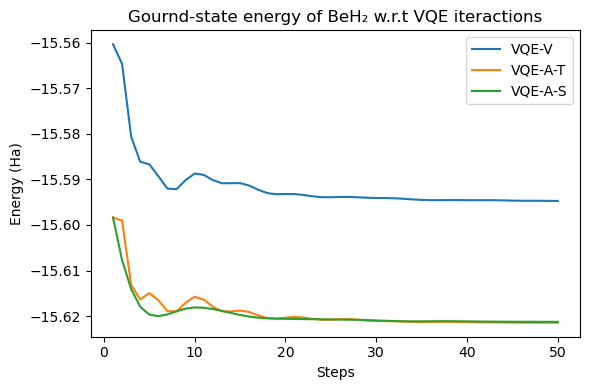

In [3]:
## Plotting the VQE energy w.r.t iterations.
plt.figure(figsize=(6, 4))
plt.plot(np.arange(1,50+1), energies_vanilla, label="VQE-V")
plt.plot(np.arange(1,50+1), adapt_energies_tapered, label="VQE-A-T")
plt.plot(np.arange(1,50+1), adapt_energies_active, label="VQE-A-S")
plt.xlabel("Steps")
plt.ylabel("Energy (Ha)")
plt.title('Gournd-state energy of BeH₂ w.r.t VQE iteractions')
plt.legend()
plt.tight_layout()
plt.savefig("./plots/energy.png")

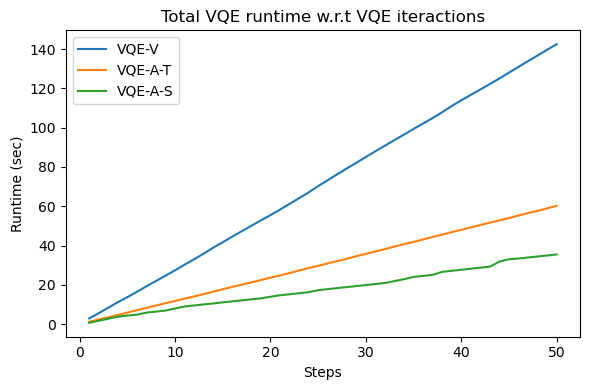

In [4]:
## Plotting the VQE runtime w.r.t iterations.
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(np.arange(1,50+1), runtime_vanilla, label="VQE-V")
plt.plot(np.arange(1,50+1), adapt_runtime_tapered, label="VQE-A-T")
plt.plot(np.arange(1,50+1), adapt_runtime_active, label="VQE-A-S")
plt.xlabel("Steps")
plt.ylabel("Runtime (sec)")
plt.title('Total VQE runtime w.r.t VQE iteractions')
plt.legend()
plt.tight_layout()
plt.savefig("./plots/runtime.png")

In [5]:
E0_VQE_V = energies_vanilla[49]
E0_VQE_A_T = adapt_energies_tapered[49]
E0_VQE_A_S = adapt_energies_active[49]
print("E0_VQE_V = ", E0_VQE_V)
print("E0_VQE_A_T = ", E0_VQE_A_T)
print("E0_VQE_A_S = ", E0_VQE_A_S)

E0_VQE_V =  -15.594727310867306
E0_VQE_A_T =  -15.621475490028006
E0_VQE_A_S =  -15.621261409464802


In [6]:
t_VQE_V = runtime_vanilla[49]
t_VQE_A_T = adapt_runtime_tapered[49]
t_VQE_A_S = adapt_runtime_active[49]
print("t_VQE_V = ", t_VQE_V)
print("t_VQE_A_T = ", t_VQE_A_T)
print("t_VQE_A_S = ", t_VQE_A_S)

t_VQE_V =  142.45114421844482
t_VQE_A_T =  60.168619871139526
t_VQE_A_S =  35.463077545166016
